<a href="https://colab.research.google.com/github/Akansh-Verma/Deep-Learning-Based-Flood-Detection-using-Images/blob/main/minor1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/dataset')

In [4]:
!dir

modelsave.h5  testing  training


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

In [7]:
train_generator = datagen.flow_from_directory(
    directory = './training',
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'binary',
    color_mode = 'rgb')

Found 5237 images belonging to 2 classes.


In [8]:
validation_generator = datagen.flow_from_directory(
    directory = './testing',
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'binary',
    color_mode = 'rgb')

Found 916 images belonging to 2 classes.


In [9]:
img_width, img_height = 224, 224

In [10]:
train_samples = 5227
validation_samples = 916
epochs = 5
batch_size = 36

In [11]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('sigmoid'))                
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(6))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                    

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
checkpoint = ModelCheckpoint("firstsave.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=5)

In [15]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

<ipython-input-15-8932602a50bb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
145/145 [==============================] - 168s 1s/step - loss: 0.2517 - accuracy: 0.9866 - val_loss: 0.0553 - val_accuracy: 0.9900
Epoch 2/5
145/145 [==============================] - 80s 557ms/step - loss: 0.2187 - accuracy: 0.9892 - val_loss: 0.0678 - val_accuracy: 0.9875
Epoch 3/5
145/145 [==============================] - 79s 549ms/step - loss: 0.1318 - accuracy: 0.9922 - val_loss: 0.1035 - val_accuracy: 0.9825
Epoch 4/5
145/145 [==============================] - 59s 409ms/step - loss: 0.1346 - accuracy: 0.9897 - val_loss: 0.1207 - val_accuracy: 0.9750
Epoch 5/5
145/145 [==============================] - 47s 326ms/step - loss: 0.1258 - accuracy: 0.9914 - val_loss: 0.0982 - val_accuracy: 0.9800


# New Section

In [16]:
model.save('project_modelsave.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


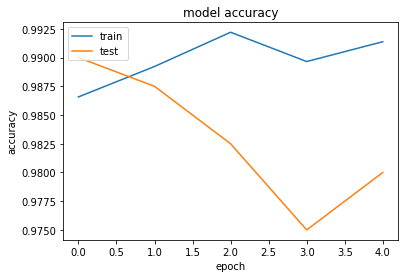

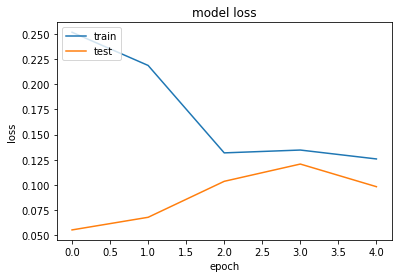

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()